# Hypothesis Testing 5 - Correlation

Correlation testing is used in data analysis for the following reasons:

1. Understanding the relationship between variables: Correlation analysis helps us determine the strength and direction of the relationship between two variables.

2. Making informed decisions: By understanding the relationship between variables, we can make informed decisions based on data and draw accurate conclusions.

3. Predictive modeling: Correlation analysis can be used to identify variables that have a strong relationship, which can then be used to build predictive models.

4. Detecting outliers: Correlation analysis can help detect outliers in data, which can then be further analyzed to determine if they are errors or legitimate data points.

5. Hypothesis testing: Correlation analysis is often used in hypothesis testing to determine if a relationship between two variables exists and if it is statistically significant.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import ttest_ind, f_oneway # Numeric Vs Categorical
from scipy.stats import pearsonr, spearmanr # Numeric Vs Numeric
from scipy.stats import kstest

from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
df = pd.read_csv('Sachin_ODI.csv')

In [8]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [9]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [10]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century,year
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False,1995
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False,1995
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False,1995
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False,1995
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False,1995


### First Vs Second Innings

In [11]:
df.groupby('Inns')['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [12]:
df_first_inns = df[df['Inns'] == 1]
df_second_inns = df[df['Inns'] == 2]

In [13]:
# scoring pattern across these two are the same
ttest_ind(df_first_inns['runs'],df_second_inns['runs'])
# Failed to reject: They are the same 

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [14]:
e1 = ECDF(df_first_inns['runs'])
e2 = ECDF(df_second_inns['runs'])

e1 and e2 are instances of the ECDF (Empirical Cumulative Distribution Function) class. The x attribute of the e1 and e2 objects represent the unique values of the runs in the first and second innings, respectively. The y attribute of e1 and e2 represent the cumulative probabilities associated with the respective x values, i.e., the fraction of runs that are less than or equal to each unique value of runs.

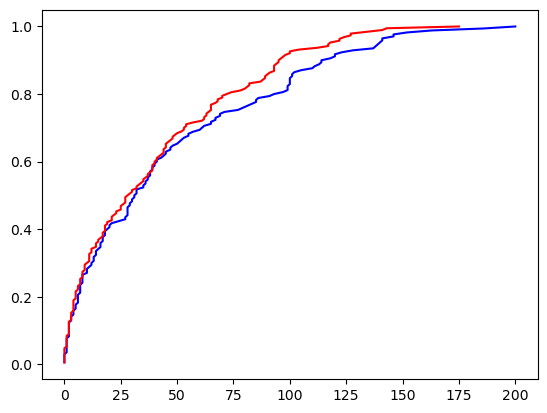

In [16]:
plt.plot(e1.x, e1.y, c = 'b')
plt.plot(e2.x, e2.y, c = 'r')

In [25]:
# H0 : first and second innings are essentially the same.
# H0: two samples came from one distribution.
kstest(df_first_inns['runs'], df_second_inns['runs'])
# p-value is high ---> Failed to reject H0.

KstestResult(statistic=0.10990712074303406, pvalue=0.20868747831732348)

Here are the main reasons why one might choose to use a Kolmogorov-Smirnov (KS) test instead of a t-test:
<br><br>
`Non-normal data:` The KS test is a non-parametric test and does not require the assumption of normality, making it a more robust alternative when the data is not normally distributed.
<br><br>
`Small sample size:` The t-test assumes that the sample size is large, but for smaller samples the normality assumption may not hold, so the KS test can be a better option.
<br><br>
`Continuous distributions:` The KS test is useful for comparing two continuous distributions, regardless of whether or not they are normal.
<br><br>
`Distribution-free testing:` The KS test is distribution-free, meaning it does not rely on any specific distributional assumptions. This makes it a useful alternative when the distribution of the data is unknown.
<br><br>
In conclusion, the choice between a t-test and a KS test depends on the nature of the data and the hypothesis being tested. The t-test is appropriate when the data is normally distributed and the sample size is large, while the KS test is a more flexible option for non-normal data or small sample sizes, or for testing the similarity of continuous distributions.

Also, `KS Test` focuses on the overall distribution as well rather than just the mean. <br>It tells us if there's any difference between the entire distribution. <br> We can see below that the mean is similar in both the cases but the distributions are different.<br> Hence, ks test gives us an overall picture.

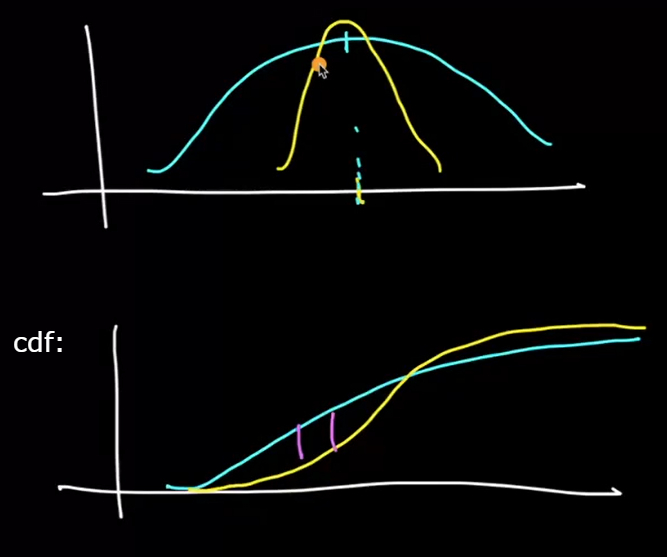

## Won Vs Loss

In [26]:
df.groupby(['Won'])['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [27]:
df_won = df[df['Won'] == True]
df_lost = df[df['Won'] == False]

In [28]:
# H0: no difference
ttest_ind(df_won['runs'], df_lost['runs'])
# p-value is very low ----> reject H0

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

In [31]:
e1 = ECDF(df_won['runs'])
e2 = ECDF(df_lost['runs'])

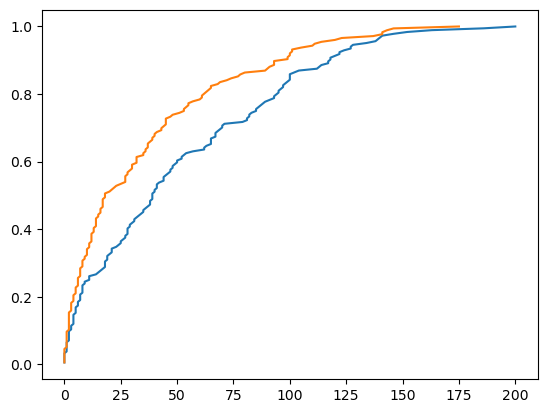

In [32]:
plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)

In [29]:
# H0: No difference
kstest(df_won['runs'], df_lost['runs'])
# p-value is low, Reject H0

KstestResult(statistic=0.20602766798418973, pvalue=0.0007769531141111421)

## Correlation

<AxesSubplot: >

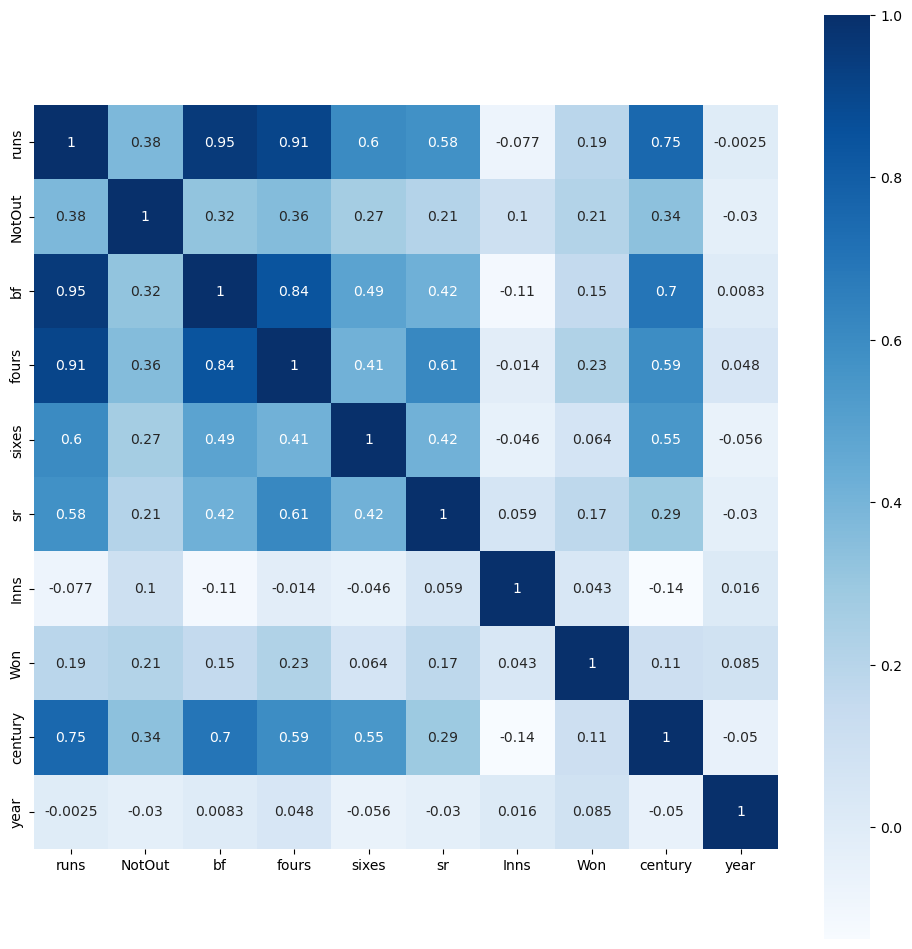

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(method='pearson'), square = True, annot = True, cmap = "Blues")

<AxesSubplot: xlabel='runs', ylabel='bf'>

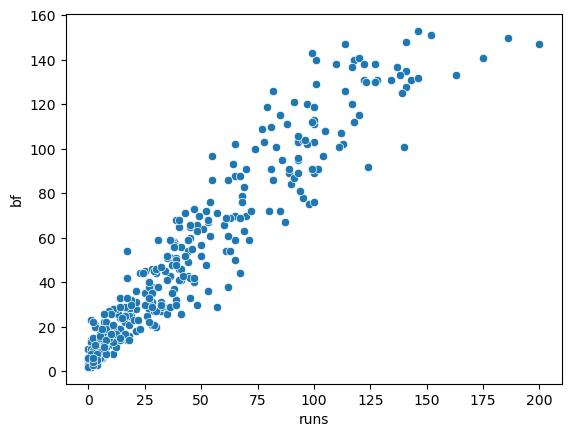

In [19]:
sns.scatterplot(x = df['runs'], y = df['bf'])

In [20]:
# H0: No correlation
pearsonr(df['runs'], df['bf'])
# rejected, hence correlation is there.

PearsonRResult(statistic=0.9535575848467752, pvalue=1.20467394572395e-188)

In [21]:
# H0: No correlation
pearsonr(df['sixes'], df['Won'])
# p-value is high, fail to reject

PearsonRResult(statistic=0.06383653147729076, pvalue=0.22695751355219024)

`We can use spearmanr as well. The condition is that the data is not linear, but monotonous.`

In [22]:
spearmanr(df['sixes'], df['Won'])

SpearmanrResult(correlation=0.07794653119273369, pvalue=0.13993462484172395)

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/